Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/110.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/110.9 kB ? eta -:--:--
   --- ------------------------------------ 10.2/110.9 kB ? eta -:--:--
   -------------- ------------------------ 41.0/110.9 kB 393.8 kB/s eta 0:00:01
   ----------------------------------- -- 102.4/110.9 kB 737.3 kB/s eta 0:00:01
   -------------------------------------- 110.9/110.9 kB 645.2 kB/s eta 0:00:00


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


All packages imported successfully!
Data loaded successfully. Shape: (26, 9)


,locality,city,full_location,green_area_km2,total_area_km2,green_percent,latitude,longitude,suitable_for_greenai
0,Lodhi Colony,Delhi,"Lodhi Colony, Delhi, India",0.07,1.42,4.93,28.584202,77.223605,False
1,Cuffe Parade,Mumbai,"Cuffe Parade, Mumbai, India",0.00,0.00,0.00,NaN,NaN,False
2,Cubbon Park,Bengaluru,"Cubbon Park, Bengaluru, India",1.19,0.65,183.08,12.974572,77.592438,True
3,Lalbagh,Bengaluru,"Lalbagh, Bengaluru, India",1.05,0.96,109.38,12.948587,77.585625,True
4,Besant Nagar,Chennai,"Besant Nagar, Chennai, India",23.50,344.53,6.82,13.009463,80.224906,True


Missing coordinates filled with city centroids where available.

Missing values:
locality                0
city                    0
full_location           0
green_area_km2          0
total_area_km2          0
green_percent           0
latitude                5
longitude               5
suitable_for_greenai    0
dtype: int64

Data types:
locality                 object
city                     object
full_location            object
green_area_km2          float64
total_area_km2          float64
green_percent           float64
latitude                float64
longitude               float64
suitable_for_greenai       bool
dtype: object


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


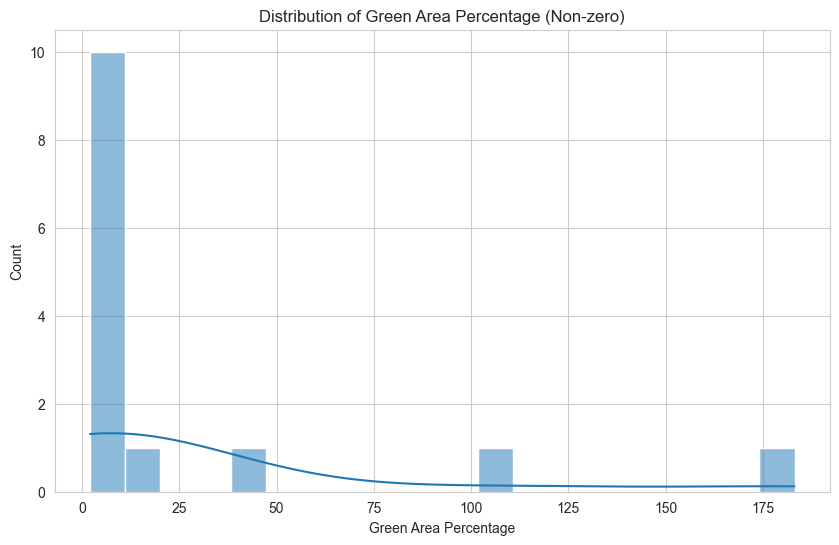

green_percent               suitable_for_greenai
                   mean     max count                  sum
city                                                      
Bengaluru        73.740  183.08     4                    2
Chennai          16.250   39.84     3                    3
Mumbai            7.405   14.81     2                    1
Kolkata           5.065   10.54     4                    3
Delhi             4.930    4.93     1                    0
Hyderabad         2.880    4.32     3                    2
Pune              1.510    3.02     2                    0
Ahmedabad         0.000    0.00     1                    0
Goa               0.000    0.00     2                    0
Gurugram          0.000    0.00     1                    0
Indore            0.000    0.00     1                    0
Kochi             0.000    0.00     1                    0
Noida             0.000    0.00     1                    0


Top 10 Green Localities:


,locality,city,green_percent
2,Cubbon Park,Bengaluru,183.08
3,Lalbagh,Bengaluru,109.38
5,Adyar,Chennai,39.84
21,Powai,Mumbai,14.81
8,Alipore,Kolkata,10.54
4,Besant Nagar,Chennai,6.82
0,Lodhi Colony,Delhi,4.93
9,New Town,Kolkata,4.86
22,Salt Lake City,Kolkata,4.86
6,Gachibowli,Hyderabad,4.32



Bottom 10 Green Localities:


,locality,city,green_percent
18,Anna Nagar,Chennai,2.09
24,Jayanagar,Bengaluru,2.50
12,Koregaon Park,Pune,3.02
6,Gachibowli,Hyderabad,4.32
7,Banjara Hills,Hyderabad,4.32
9,New Town,Kolkata,4.86
22,Salt Lake City,Kolkata,4.86
0,Lodhi Colony,Delhi,4.93
4,Besant Nagar,Chennai,6.82
8,Alipore,Kolkata,10.54



Interactive Map:


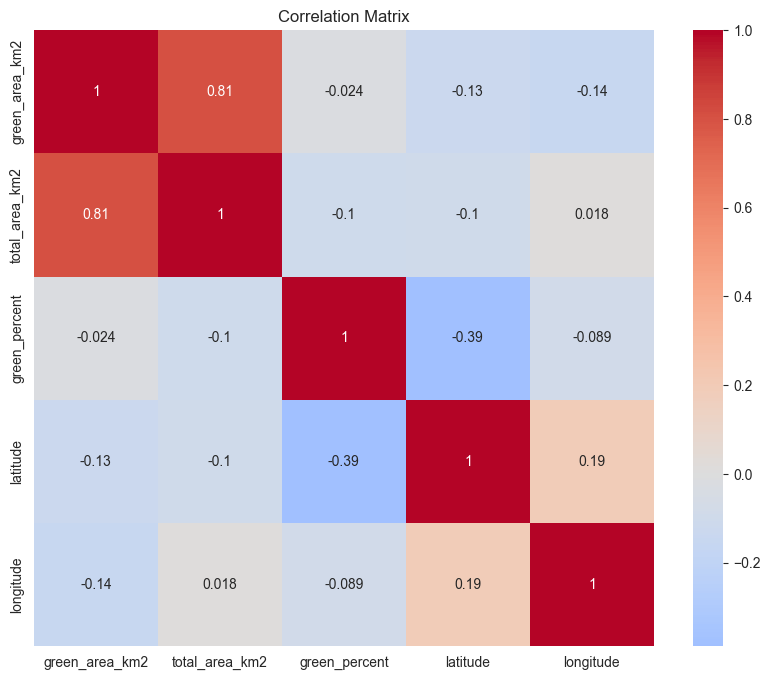


Processed data saved to 'processed_greenai_data.csv'


In [2]:
# Install missing packages if needed
try:
    import folium
    from folium.plugins import MarkerCluster
except ImportError:
    !pip install folium
    import folium
    from folium.plugins import MarkerCluster

# Standard imports with error handling
try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    print("All packages imported successfully!")
except ImportError as e:
    print(f"Error importing packages: {e}")
    !pip install pandas numpy matplotlib seaborn
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Load data with error handling
try:
    df = pd.read_csv('greenai_locality_green_spaces1.csv')
    print(f"Data loaded successfully. Shape: {df.shape}")
    display(df.head())
except FileNotFoundError:
    print("Error: File 'greenai_locality_green_spaces1.csv' not found.")
    print("Please ensure the file is in the current directory.")
except Exception as e:
    print(f"Error loading data: {e}")

# Data cleaning - handle missing coordinates
if 'latitude' in df.columns and 'longitude' in df.columns:
    city_centroids = {
        'Bengaluru': (12.9716, 77.5946),
        'Mumbai': (19.0760, 72.8777),
        'Delhi': (28.7041, 77.1025),
        'Chennai': (13.0827, 80.2707),
        'Hyderabad': (17.3850, 78.4867),
        'Kolkata': (22.5726, 88.3639),
        'Pune': (18.5204, 73.8567),
        'Noida': (28.5355, 77.3910),
        'Gurugram': (28.4595, 77.0266)
    }
    
    for idx, row in df.iterrows():
        if pd.isna(row['latitude']) and row['city'] in city_centroids:
            df.at[idx, 'latitude'], df.at[idx, 'longitude'] = city_centroids[row['city']]
    print("Missing coordinates filled with city centroids where available.")

# Basic analysis
print("\nMissing values:")
print(df.isnull().sum())

print("\nData types:")
print(df.dtypes)

# Green space distribution visualization
plt.figure(figsize=(10, 6))
if 'green_percent' in df.columns:
    sns.histplot(df[df['green_percent'] > 0]['green_percent'], bins=20, kde=True)
    plt.title('Distribution of Green Area Percentage (Non-zero)')
    plt.xlabel('Green Area Percentage')
    plt.ylabel('Count')
    plt.show()
else:
    print("'green_percent' column not found in dataset")

# City-wise analysis
if 'city' in df.columns and 'green_percent' in df.columns:
    city_stats = df.groupby('city').agg({
        'green_percent': ['mean', 'max', 'count'],
        'suitable_for_greenai': 'sum'
    }).sort_values(('green_percent', 'mean'), ascending=False)
    display(city_stats)
else:
    print("Required columns for city-wise analysis not found")

# Top and bottom localities
if 'green_percent' in df.columns:
    top_10 = df[df['green_percent'] > 0].sort_values('green_percent', ascending=False).head(10)
    bottom_10 = df[df['green_percent'] > 0].sort_values('green_percent').head(10)

    print("\nTop 10 Green Localities:")
    display(top_10[['locality', 'city', 'green_percent']])

    print("\nBottom 10 Green Localities:")
    display(bottom_10[['locality', 'city', 'green_percent']])
else:
    print("Cannot analyze top/bottom localities - 'green_percent' column missing")

# Interactive map with folium
try:
    if 'latitude' in df.columns and 'longitude' in df.columns:
        green_map = folium.Map(location=[20.5937, 78.9629], zoom_start=5)
        marker_cluster = MarkerCluster().add_to(green_map)

        for idx, row in df.iterrows():
            if pd.notna(row['latitude']):
                color = 'green' if row.get('suitable_for_greenai', False) else 'red'
                icon = 'leaf' if row.get('suitable_for_greenai', False) else 'info-sign'
                
                popup_text = f"""
                <b>{row.get('locality', 'N/A')}</b><br>
                City: {row.get('city', 'N/A')}<br>
                Green %: {row.get('green_percent', 'N/A')}<br>
                Suitable: {'Yes' if row.get('suitable_for_greenai', False) else 'No'}
                """
                
                folium.Marker(
                    location=[row['latitude'], row['longitude']],
                    popup=popup_text,
                    icon=folium.Icon(color=color, icon=icon)
                ).add_to(marker_cluster)

        print("\nInteractive Map:")
        display(green_map)
    else:
        print("Cannot create map - missing latitude/longitude columns")
except Exception as e:
    print(f"Error creating folium map: {e}")
    print("Trying alternative visualization with matplotlib...")
    
    # Alternative visualization
    if 'latitude' in df.columns and 'longitude' in df.columns:
        plt.figure(figsize=(12, 8))
        plt.scatter(
            df['longitude'], 
            df['latitude'],
            c=df['suitable_for_greenai'].map({True: 'green', False: 'red'}),
            alpha=0.6
        )
        plt.title('Geographical Distribution of Localities')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.grid(True)
        plt.show()

# Correlation analysis
numeric_cols = df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 1:
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')
    plt.show()
else:
    print("Not enough numeric columns for correlation analysis")

# Save processed data
try:
    df.to_csv('processed_greenai_data.csv', index=False)
    print("\nProcessed data saved to 'processed_greenai_data.csv'")
except Exception as e:
    print(f"Error saving processed data: {e}")